# Dataset Loader

### BadDetection Procedure:
1. Apply notch and bandpass filter if it has not been done before
2. Remove the breaks
3. Cut the data into trials
4. Check for each trial (and channel) if it contains nans
5. Check for each trial (and channel) if it contains flat areas
6. Check for each trial if a channel has very low or high correlations with other channels
   indicative of either high noise or electrode drift. 
7. Output a mask that can be used to filter out bad trials.

Notes:
The Bad Trial Detector can be called before preprocessing (creates a copy to remove low/high frequency noise before investigating the trials and does filtering internally in that case) or after the preprocessing. However, the Bad Trial Detector also checks for flat channels and normalizing in a previous preprocessing step would render that step useless. Therefore, we will apply the Bad Trial Detection first. 

### Preprocessing Procedure:
The preprocessing pipeline used in this script consists of:
1. Notch Filter (60Hz)
2. Bandpass Filter with a Kaiser Window (1-95Hz)
3. Normalization
4. Clamping (>20 std devs)

Notes:
Another option for denoising is wavelet denoising. The function dwt_denoising() from the Preprocessor applies a DWT or SWT to decompose the data, offers several thresholding options, and then inverts the thresholded data back to the time domain for filtering.

This notebook shows how to use the Preprocessing and Bad Trial Detection from the Dataset_Loader.
If remove_bads is chosen to be True for return_dataset function of the Dataset Loader, this mask is used to filter out bad trials from the dataset, when return_dataset is called from the Dataset_Loader class. 

Note: this notebook assumes you are running the code from .../sven-thesis. 

In [19]:
from dataset_loader import DatasetLoader

subject_id = "P005"
#Specify directory where the recordings for one subject are stored
dir_path = "./data/recordings/sub-{}".format(subject_id)

#Specify what to do for bad trial detection and preprocessing.
bad_detection_params = {
    "bad_by_nan": {},
    "bad_by_flat": {
      "flat_thresh": 1e-10
        },
    "bad_by_correlation": {
        "min_threshold": 0.2,
        "max_threshold": 0.99}
    }

#The reason why preprocessing is done on the whole dataset with bads, is that the filtering is optimal
#for the longest time series and cutting out trials would induce high frequency artifacts.
#We normalize after filtering because noise frequencies may impact the normalization.
preprocessing_params = {
    "notch_filter": {"freqs": [60.0]},
    "bandpass_filter": {
        "low": 1.0, 
        "high": 95.0,
        "width_low": 2.0, 
        "width_high": 6.0,
        "ripple_low": 72.0, 
        "ripple_high": 20.0
        },
    "normalization": {"per_channel": True, "clamp": 20.0},
    }

#Initialize DatasetLoader
A = DatasetLoader(
    dir_path, 
    sessions=[1,2,3,4,5,6], 
    runs = [],
    fs = 250,
    event_time = 2,
    bad_detection_params = bad_detection_params,
    preprocessing_params = preprocessing_params,
    )

Applying bad detection...


Bandpass filtering: 100%|██████████| 12/12 [00:21<00:00,  1.78s/it]
c:\Users\s_gue\Desktop\master_project\sven-thesis\dataset\dataset_loader.py:238: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  eeg_matrix = np.array([group[self.chan_names].values for name, group in grouped])


Sample 249 has shape (479, 8). Excluding...


c:\Users\s_gue\Desktop\master_project\sven-thesis\dataset\dataset_loader.py:238: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  eeg_matrix = np.array([group[self.chan_names].values for name, group in grouped])


Sample 249 has shape (403, 8). Excluding...
...done!
Applying preprocessing...


Normalization: 100%|██████████| 12/12 [00:02<00:00,  4.92it/s]

...done!


## To get the dataset into the right format, call return_dataset() to return the data, or return_dataset(save_dir="...") to save the data in a specified directory.

Plot detected bad trials to see what is going on with those.
The plots will be saved in ./data/visualizations/[recording_name]/bad_sub_trials/

In [ ]:
A.plot_bads()

To save the data, run the following function and decide if you want detected bad sub trials to be removed or not:

In [ ]:
save_dir = "./data/preprocessed/wet/{}".format(subject_id)
out = A.return_dataset(remove_bads = True, save_dir = save_dir)

Output shape after removal of bad sub trials:

In [5]:
out[1][2].shape

(596, 500, 8)

Additionally, the Dataset_Loader offers a number of plotting functions:

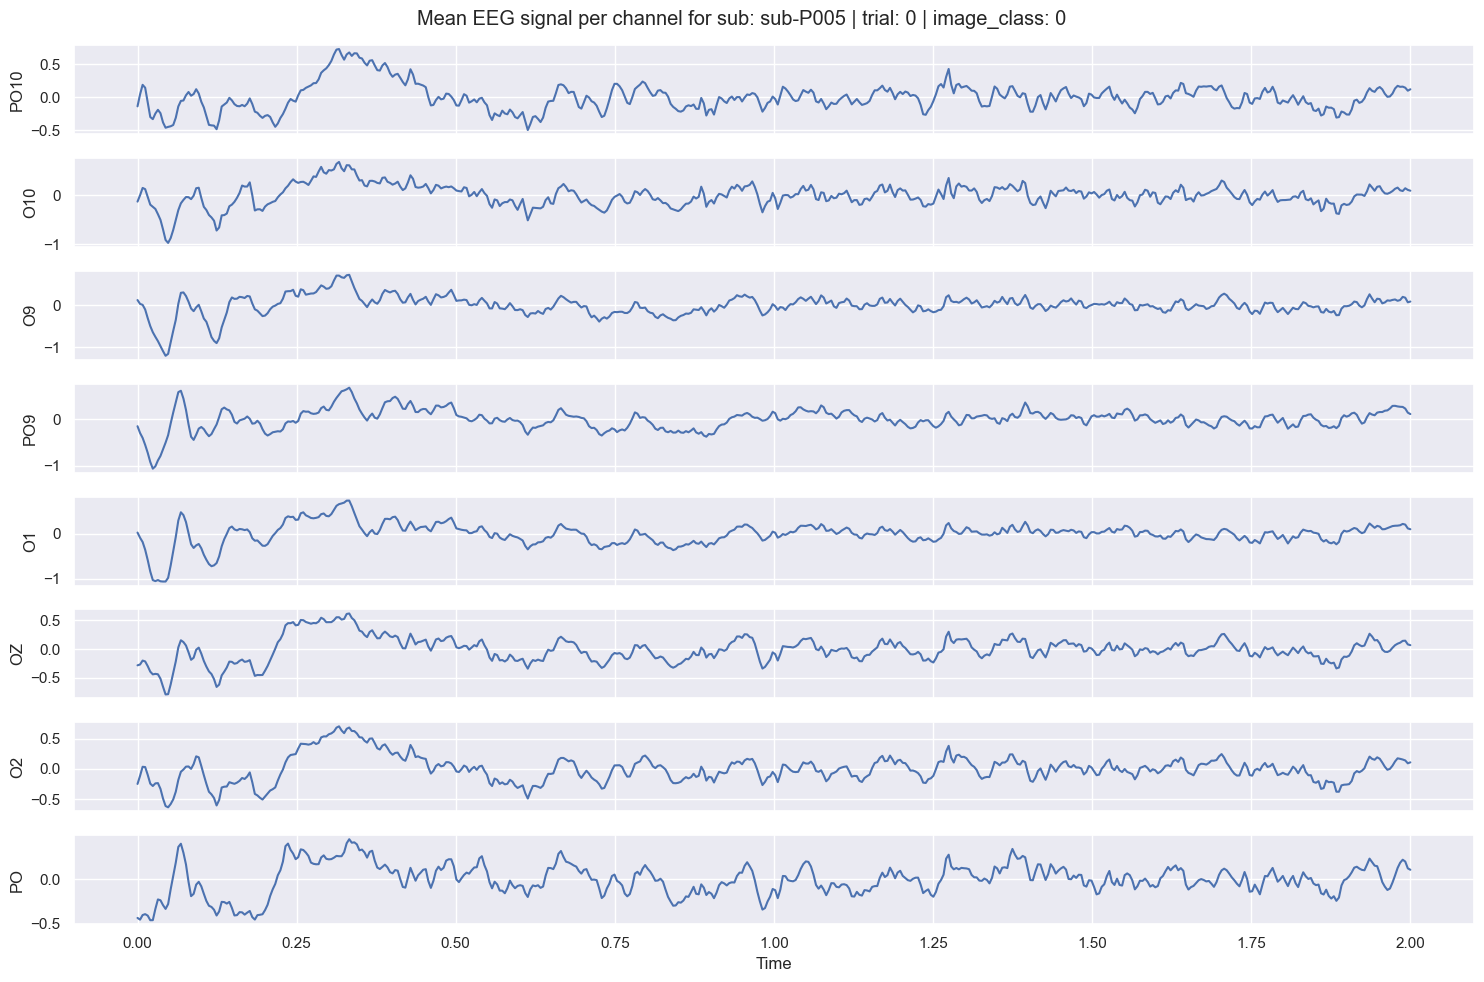

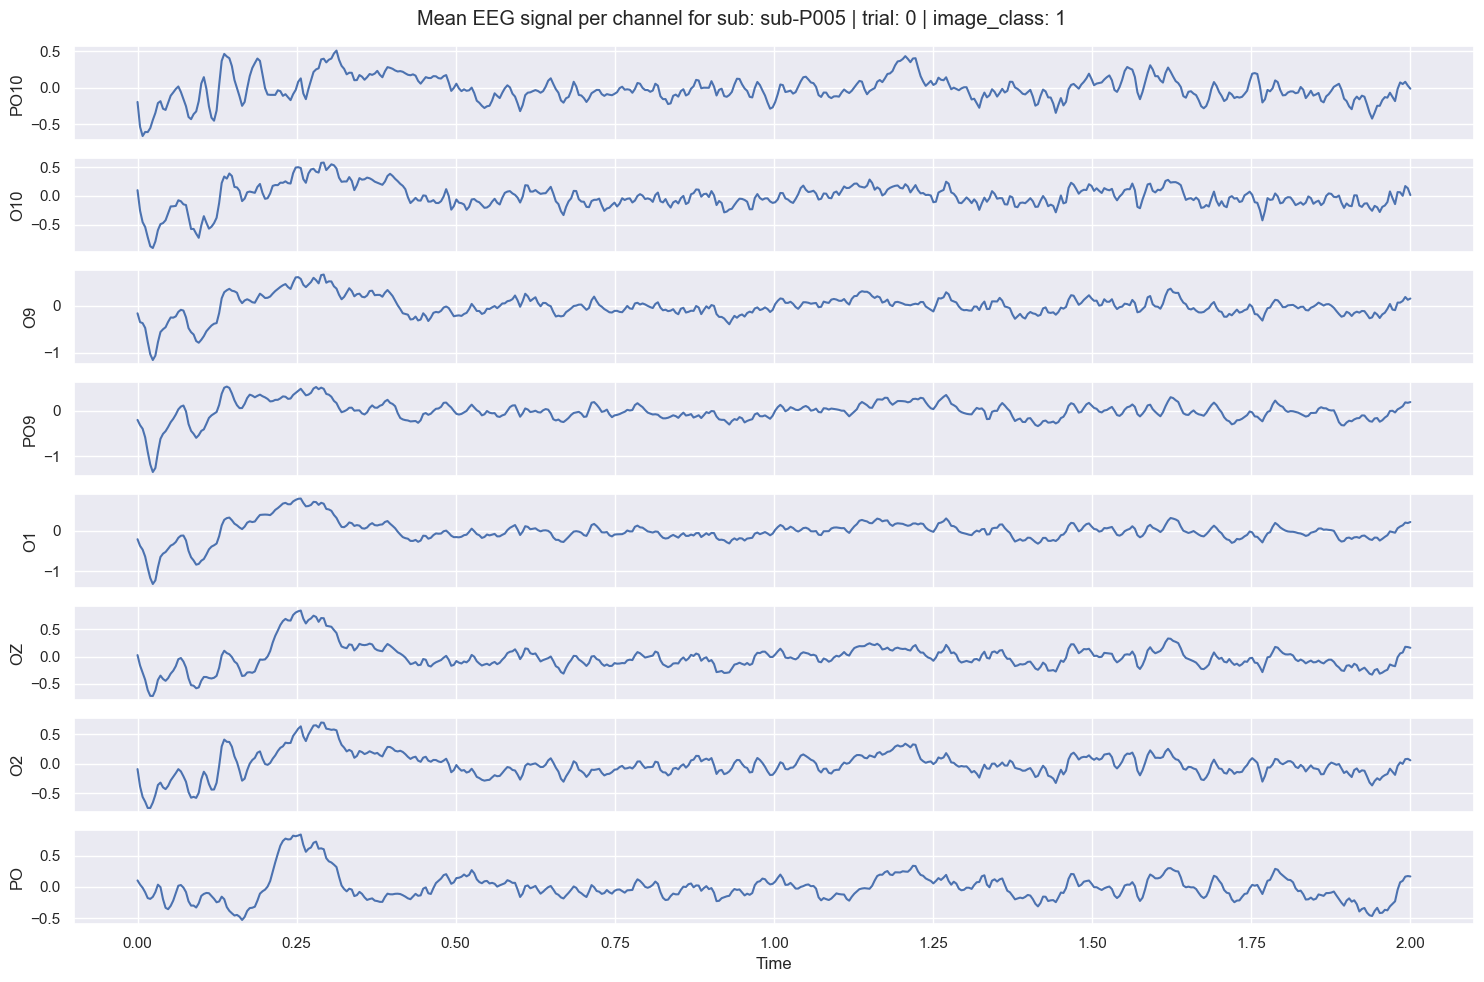

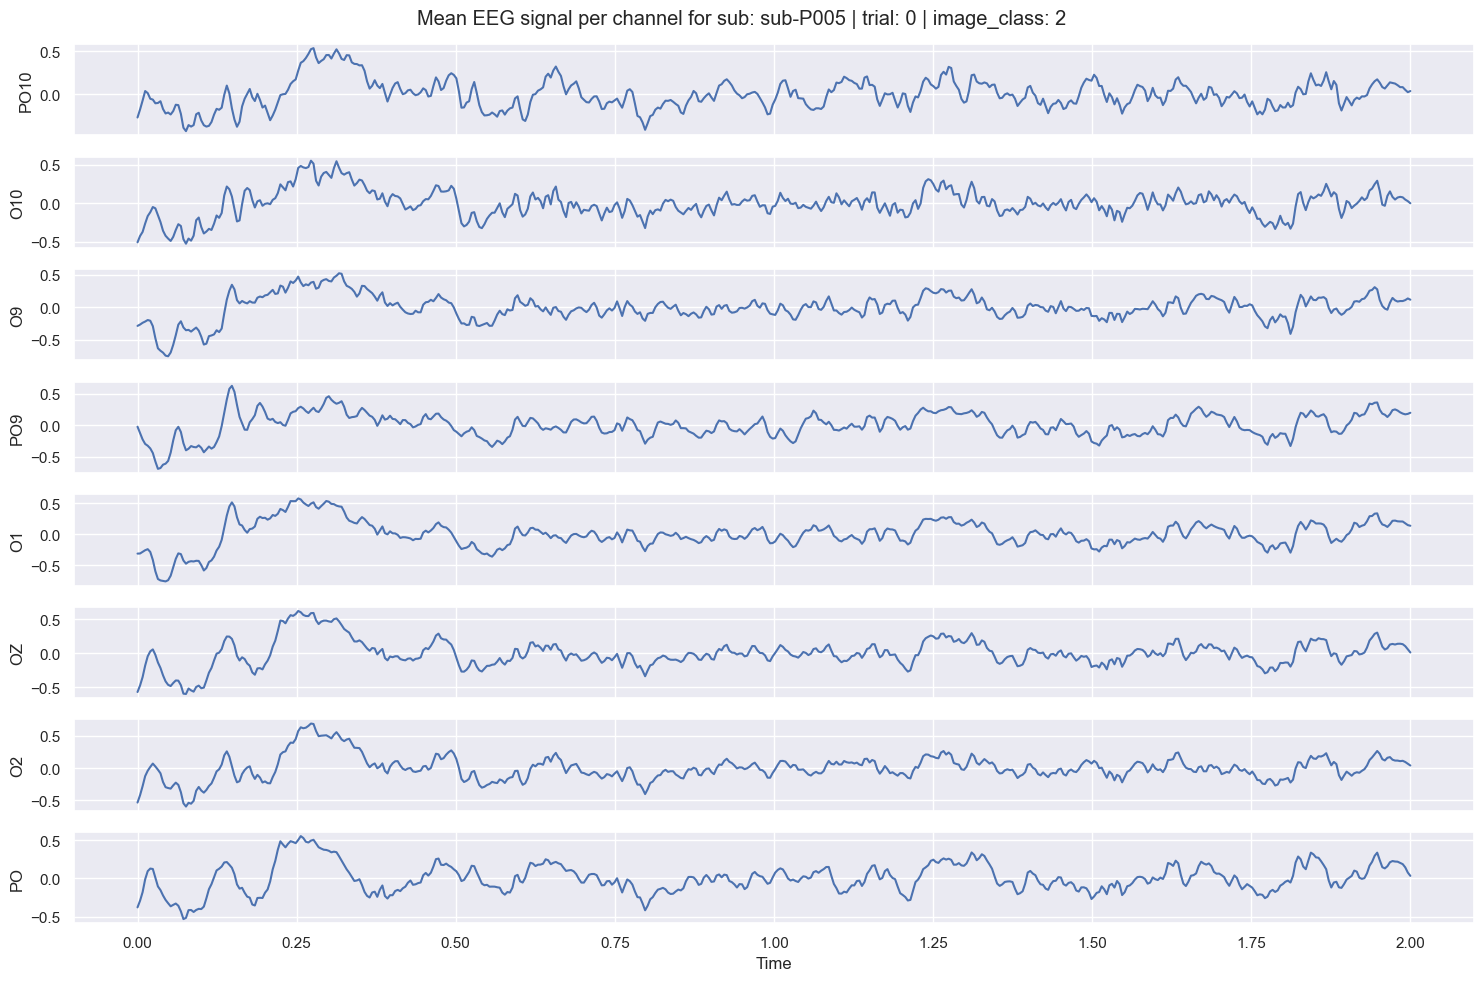

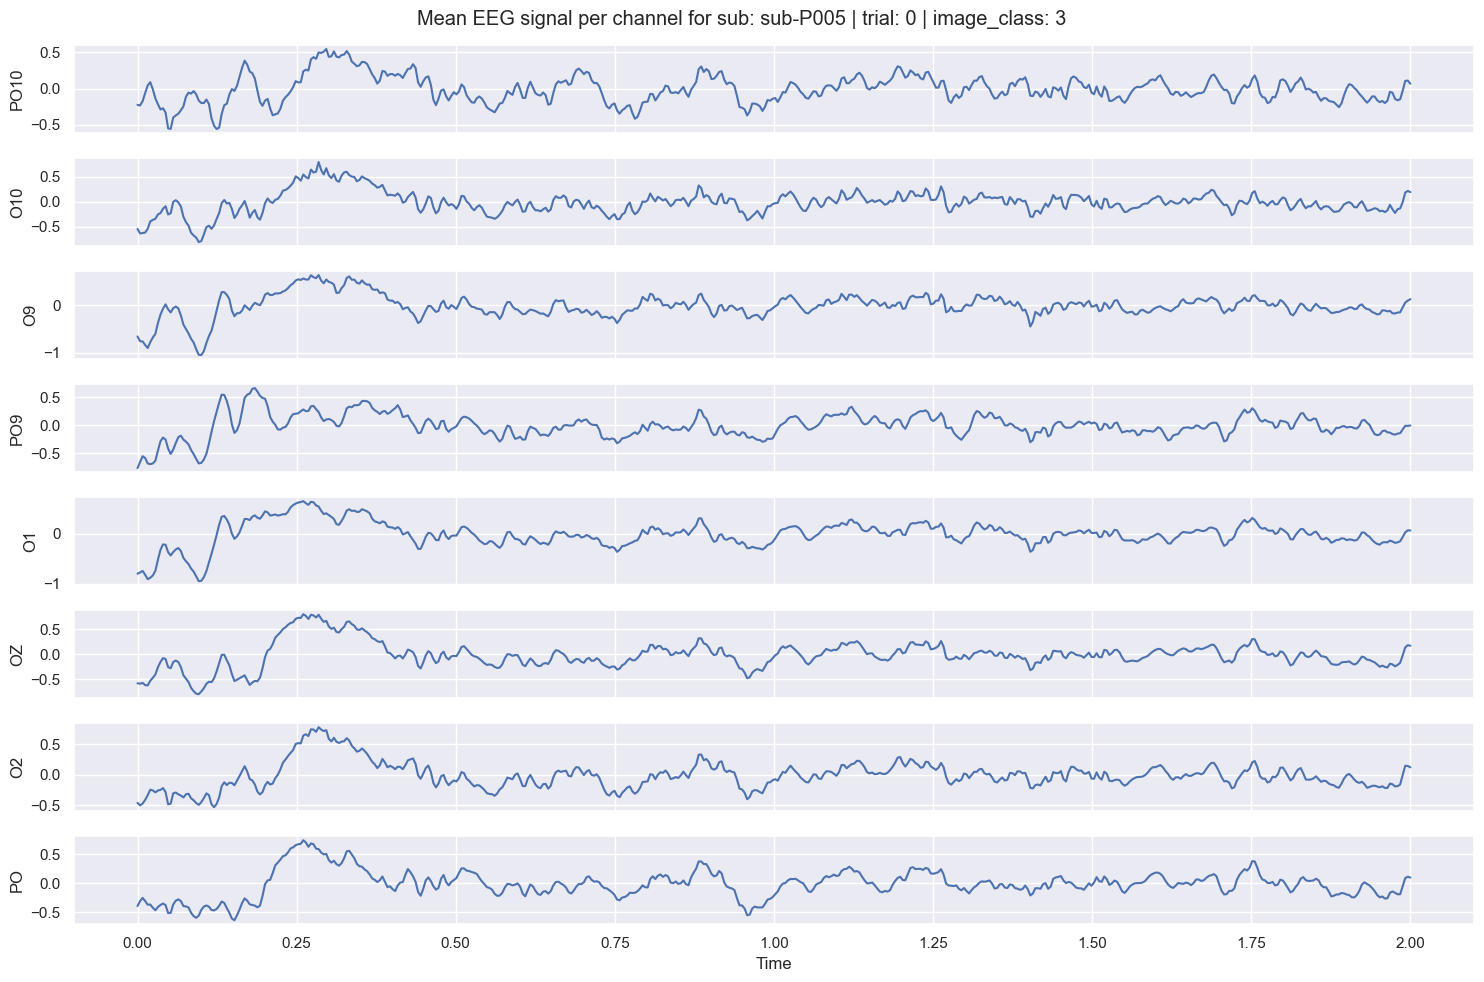

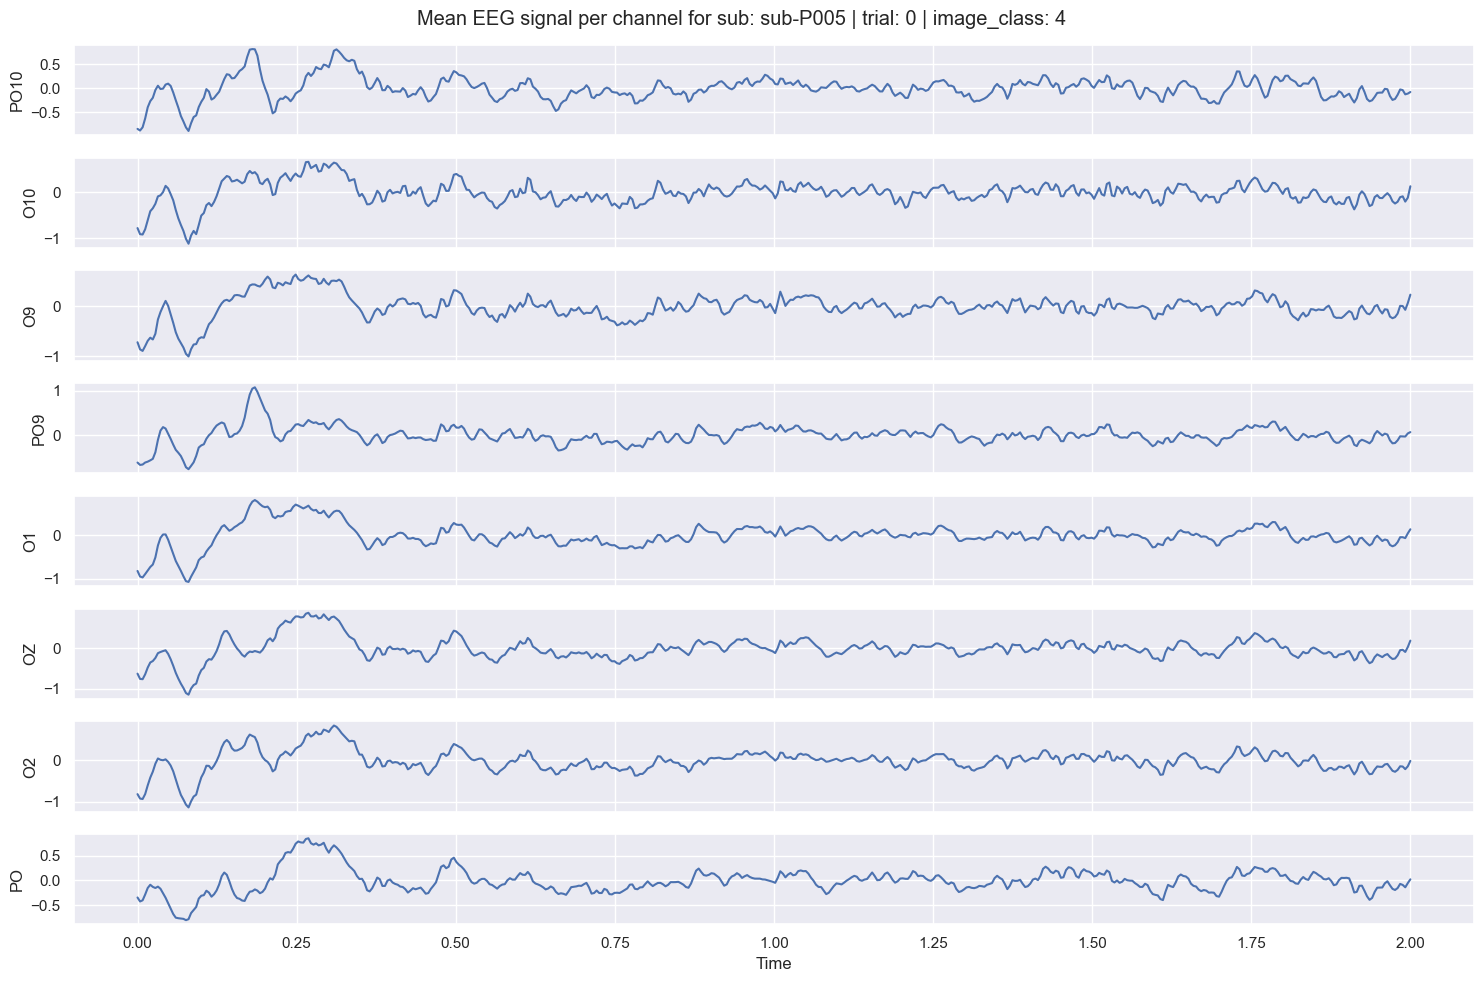

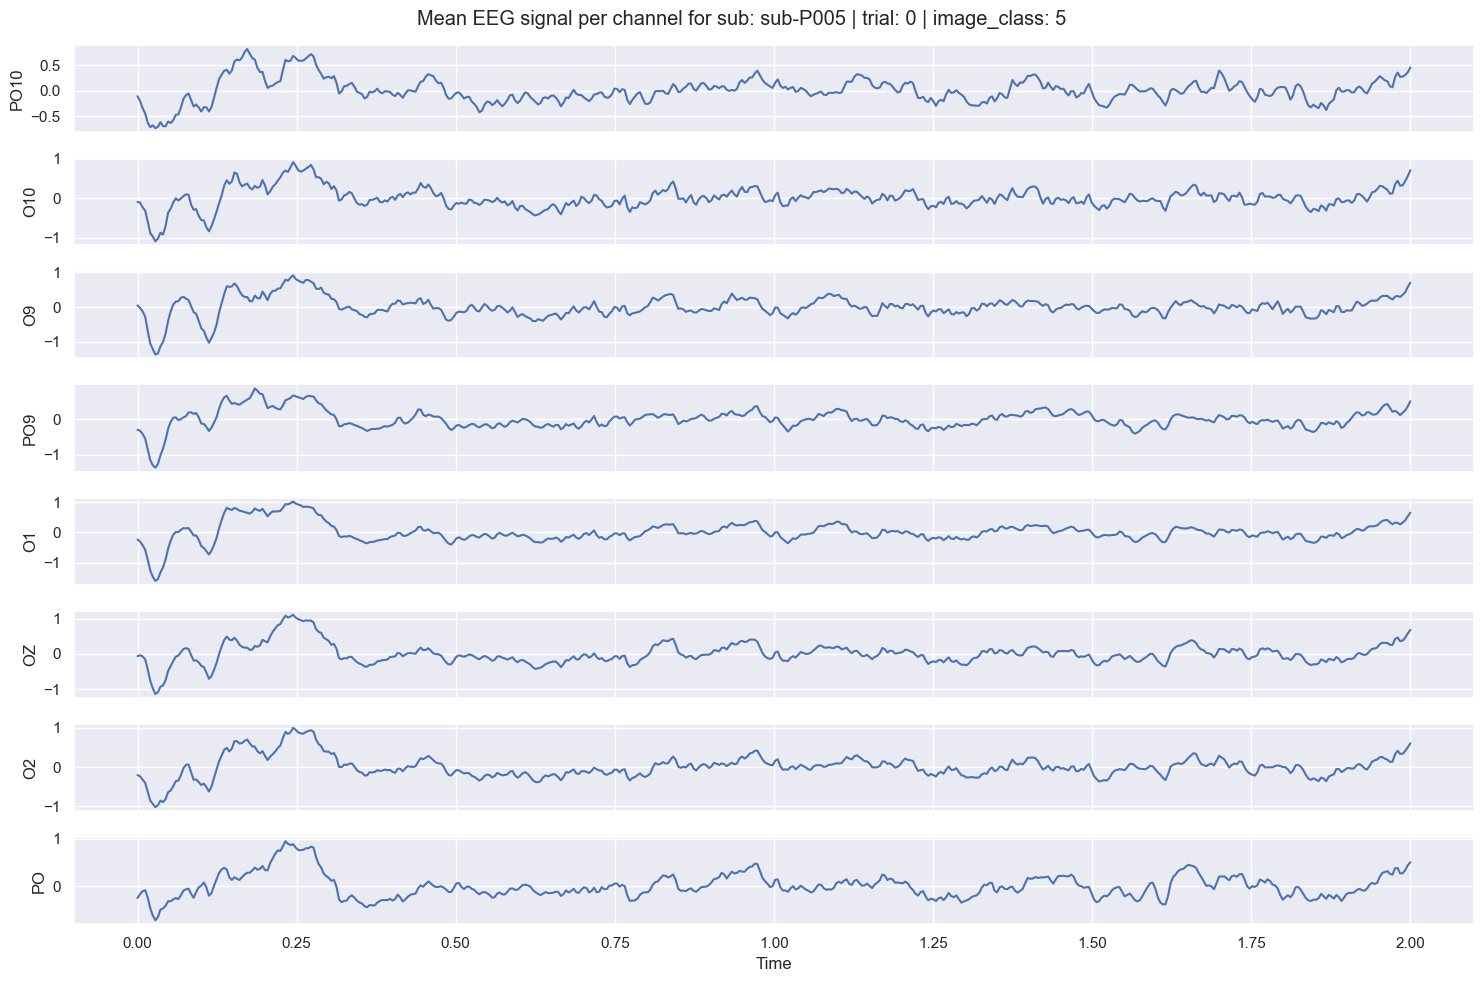

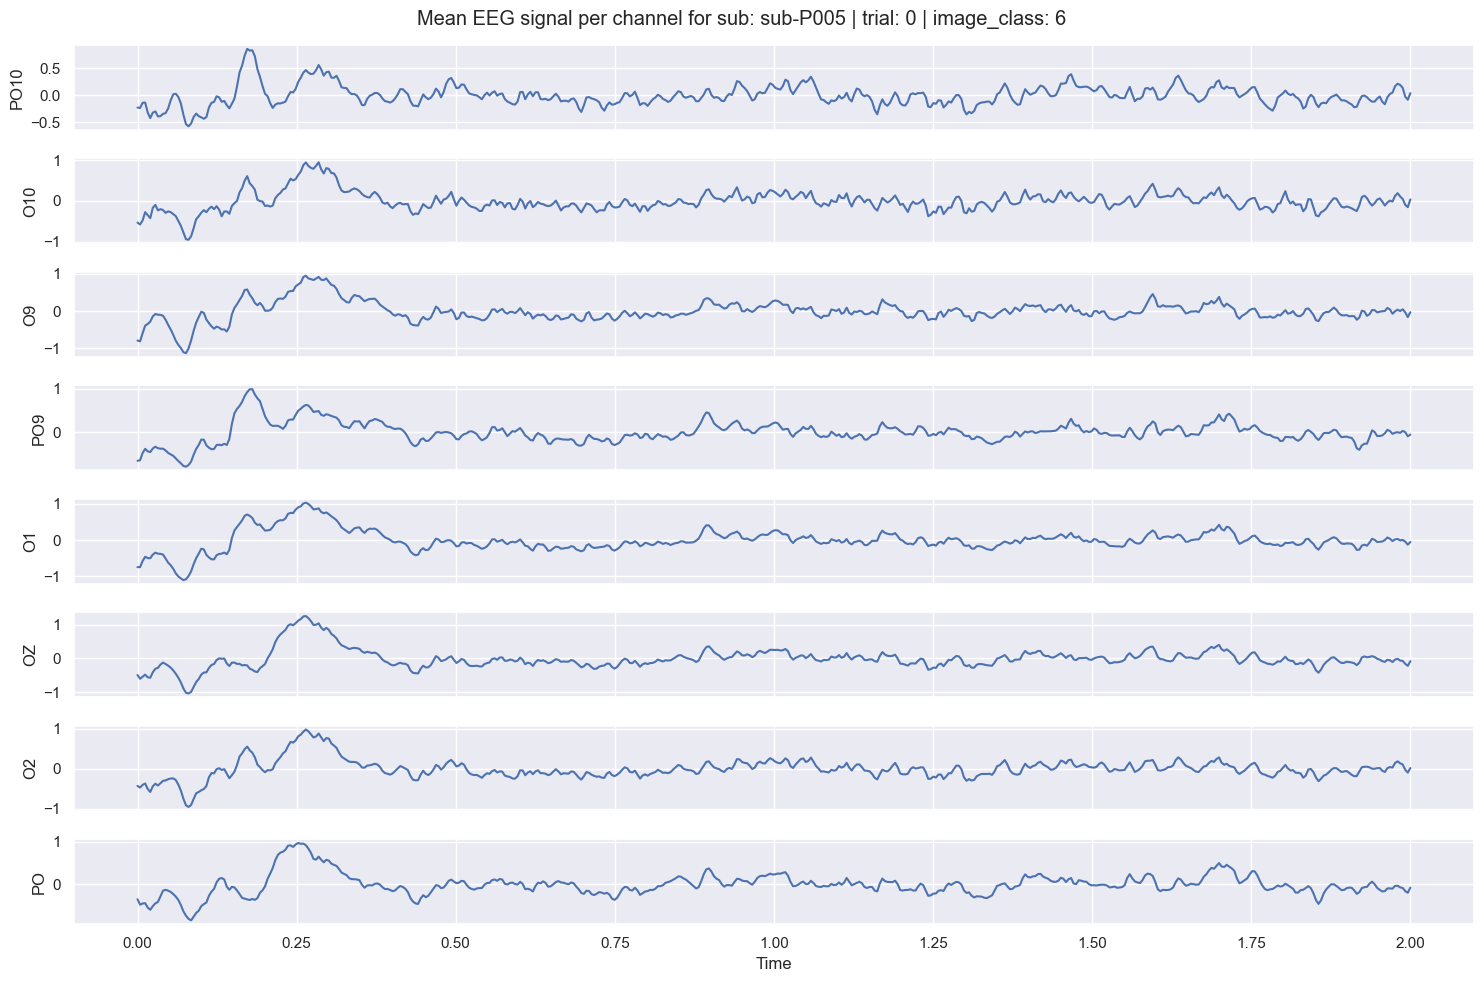

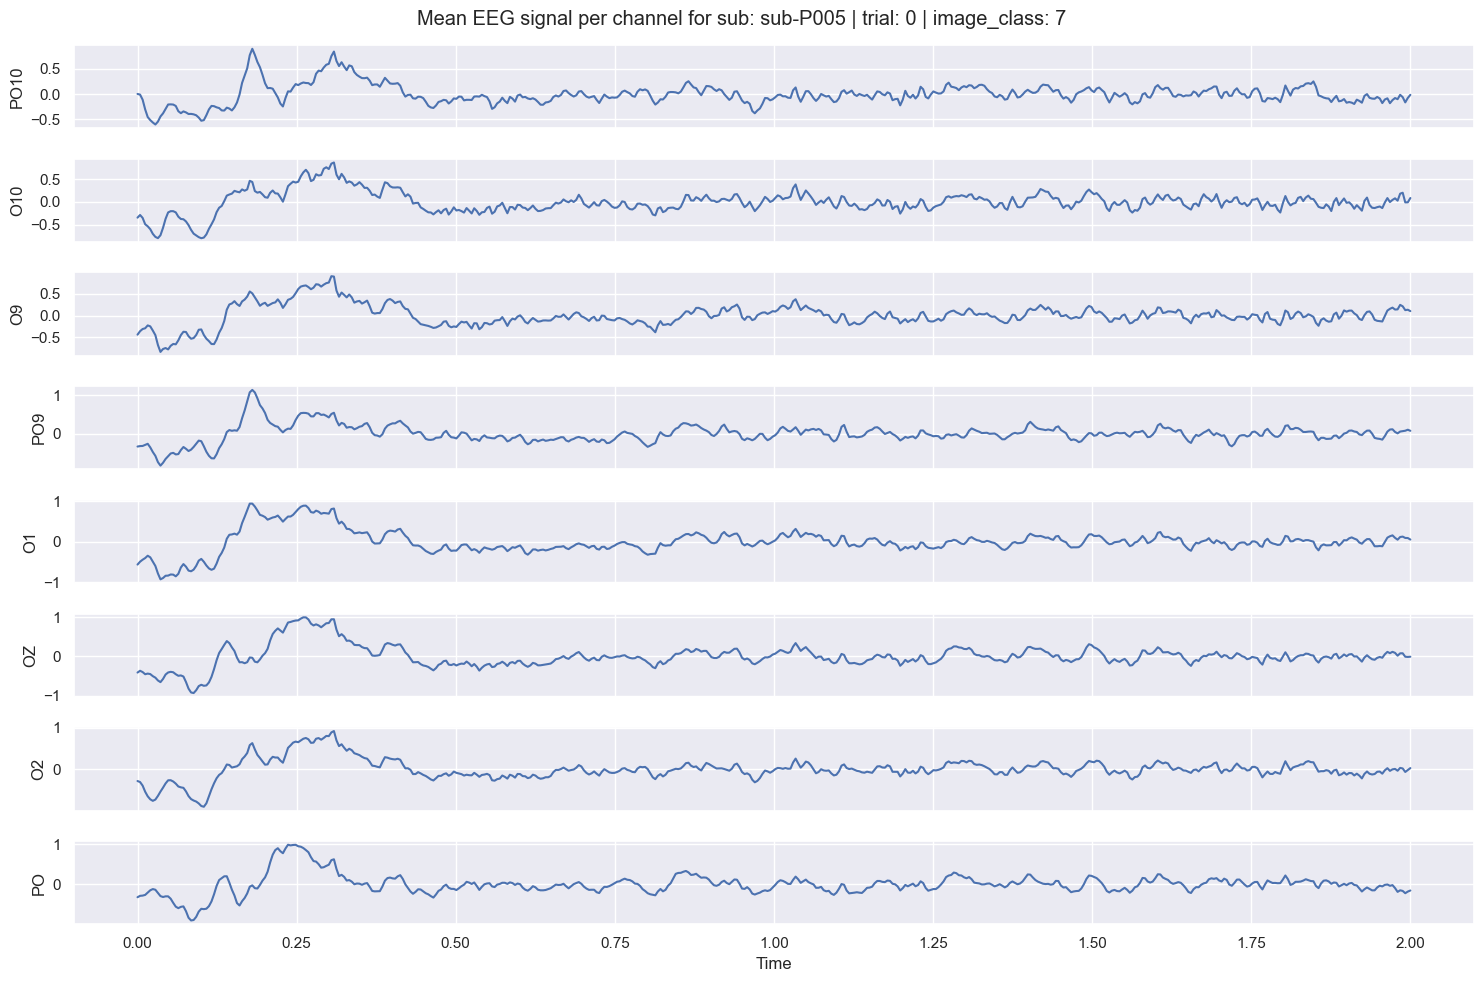

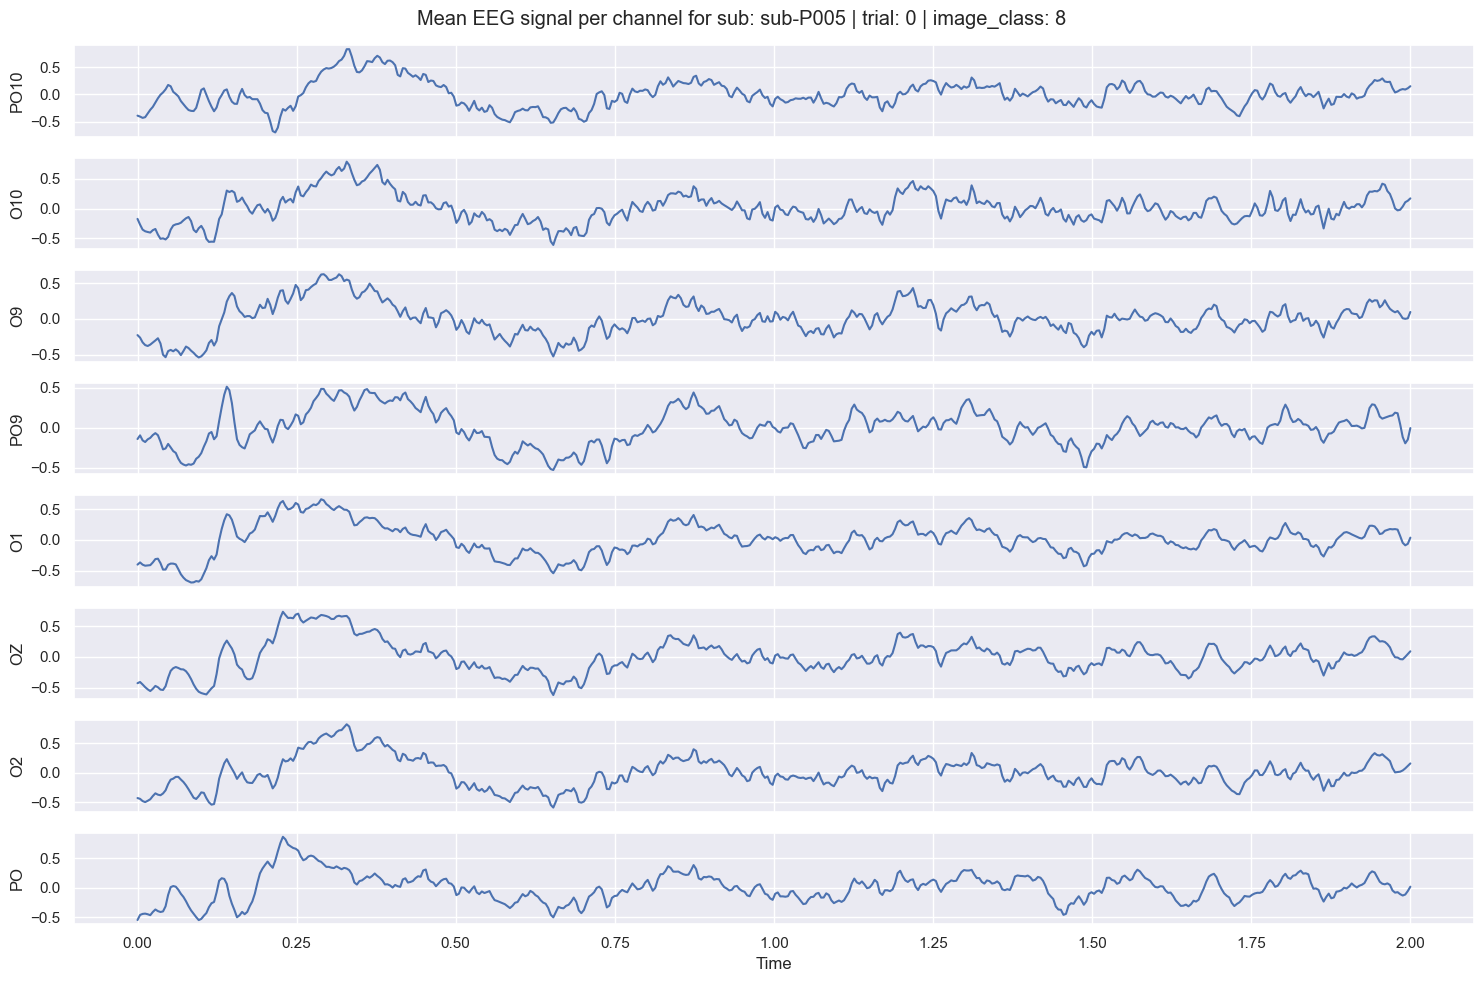

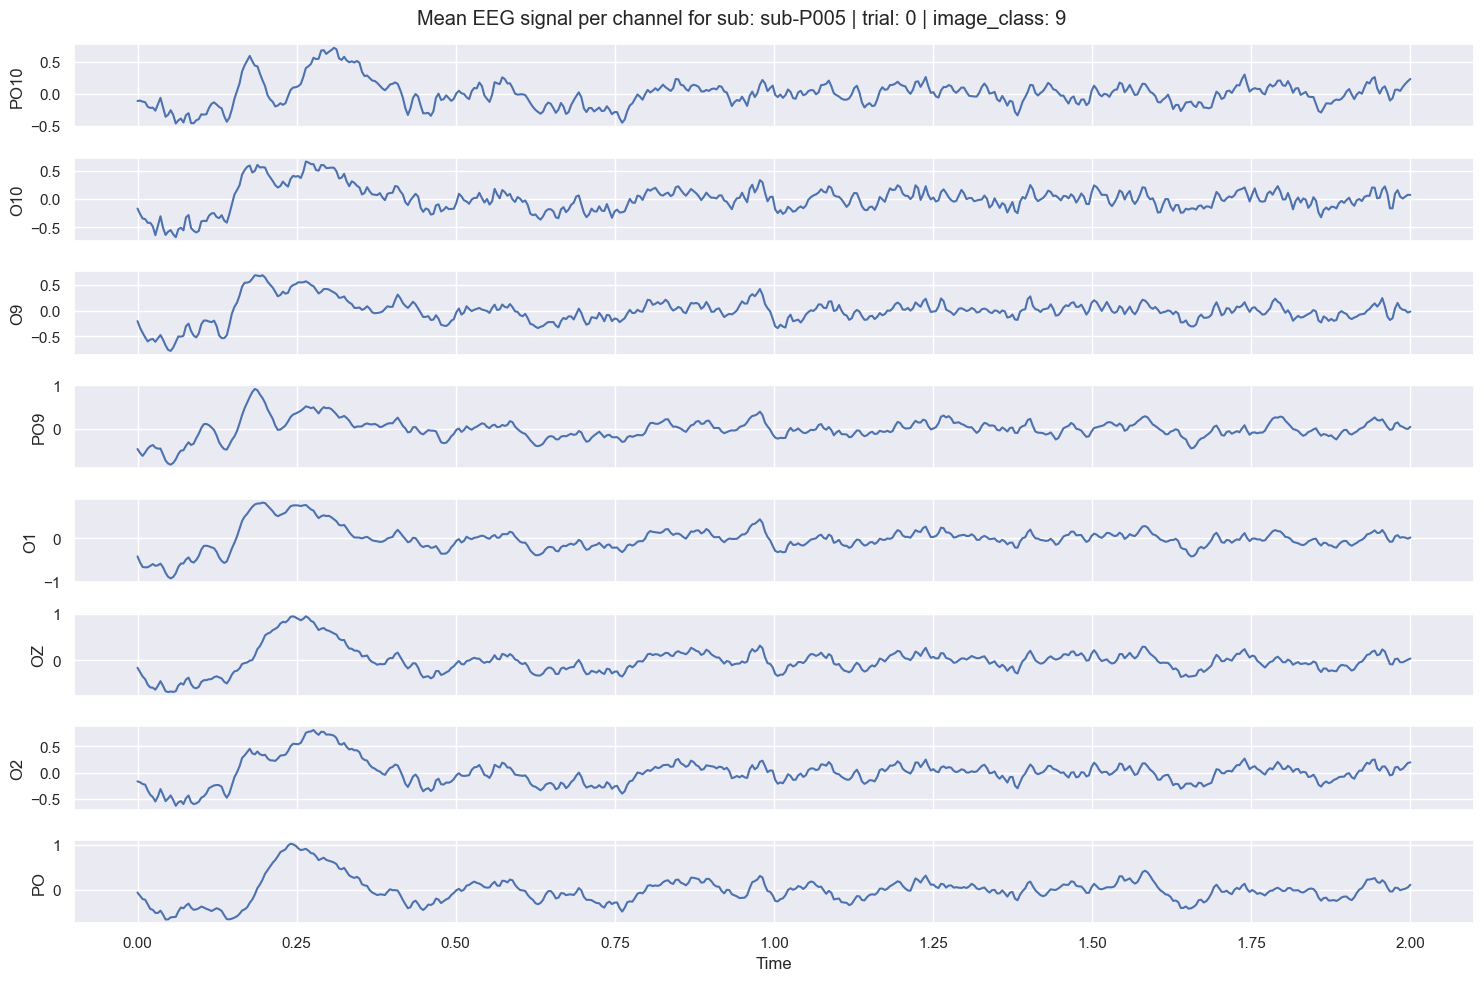

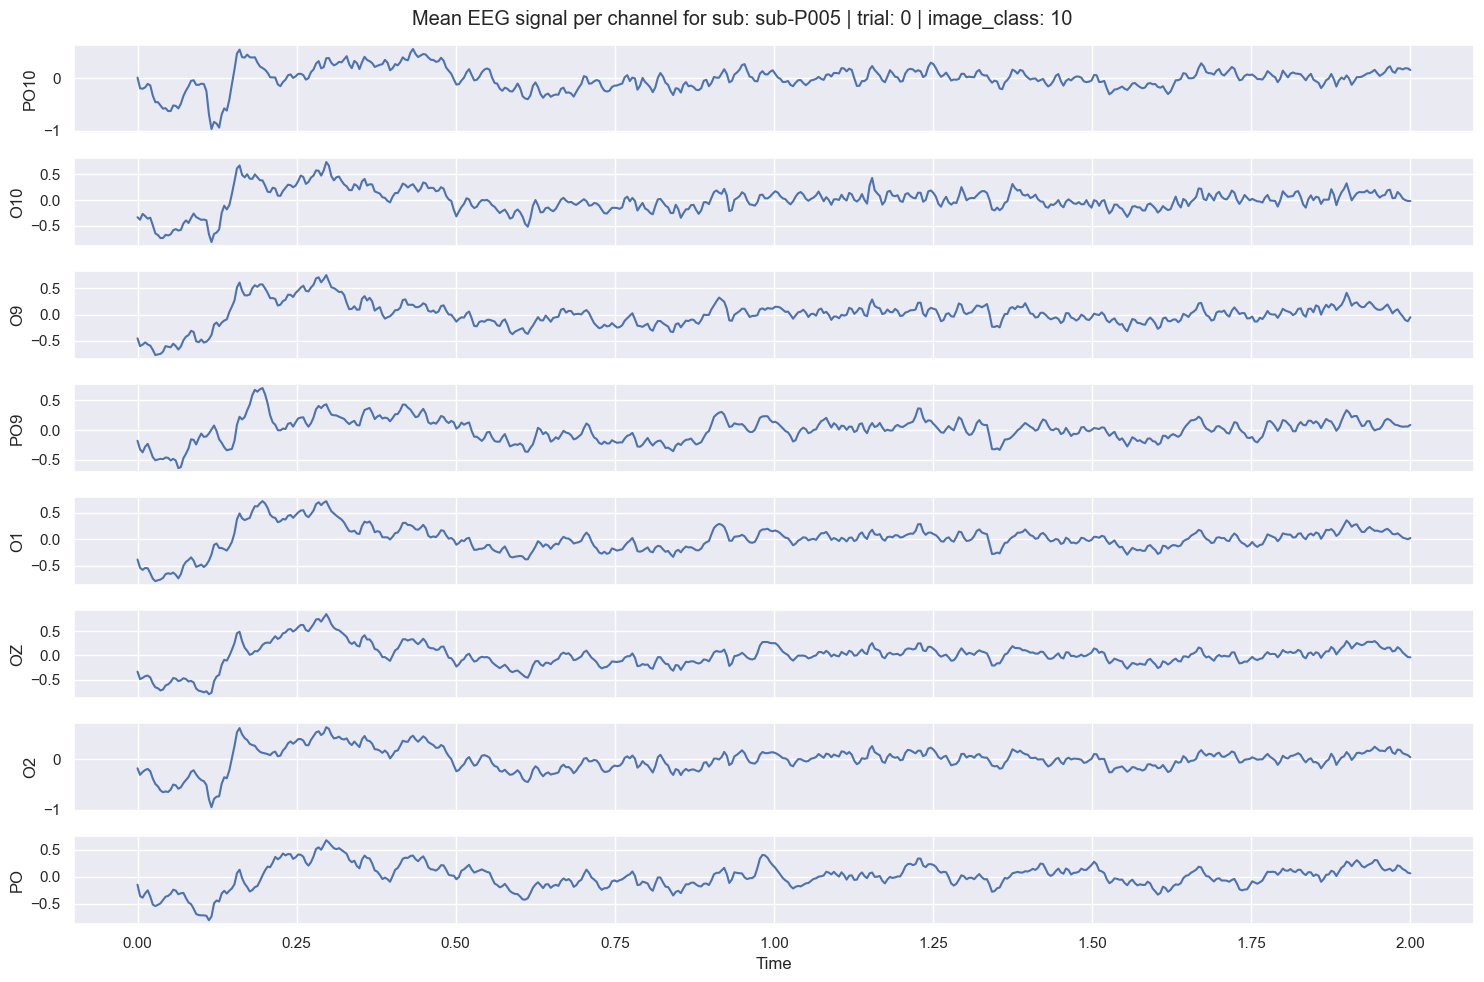

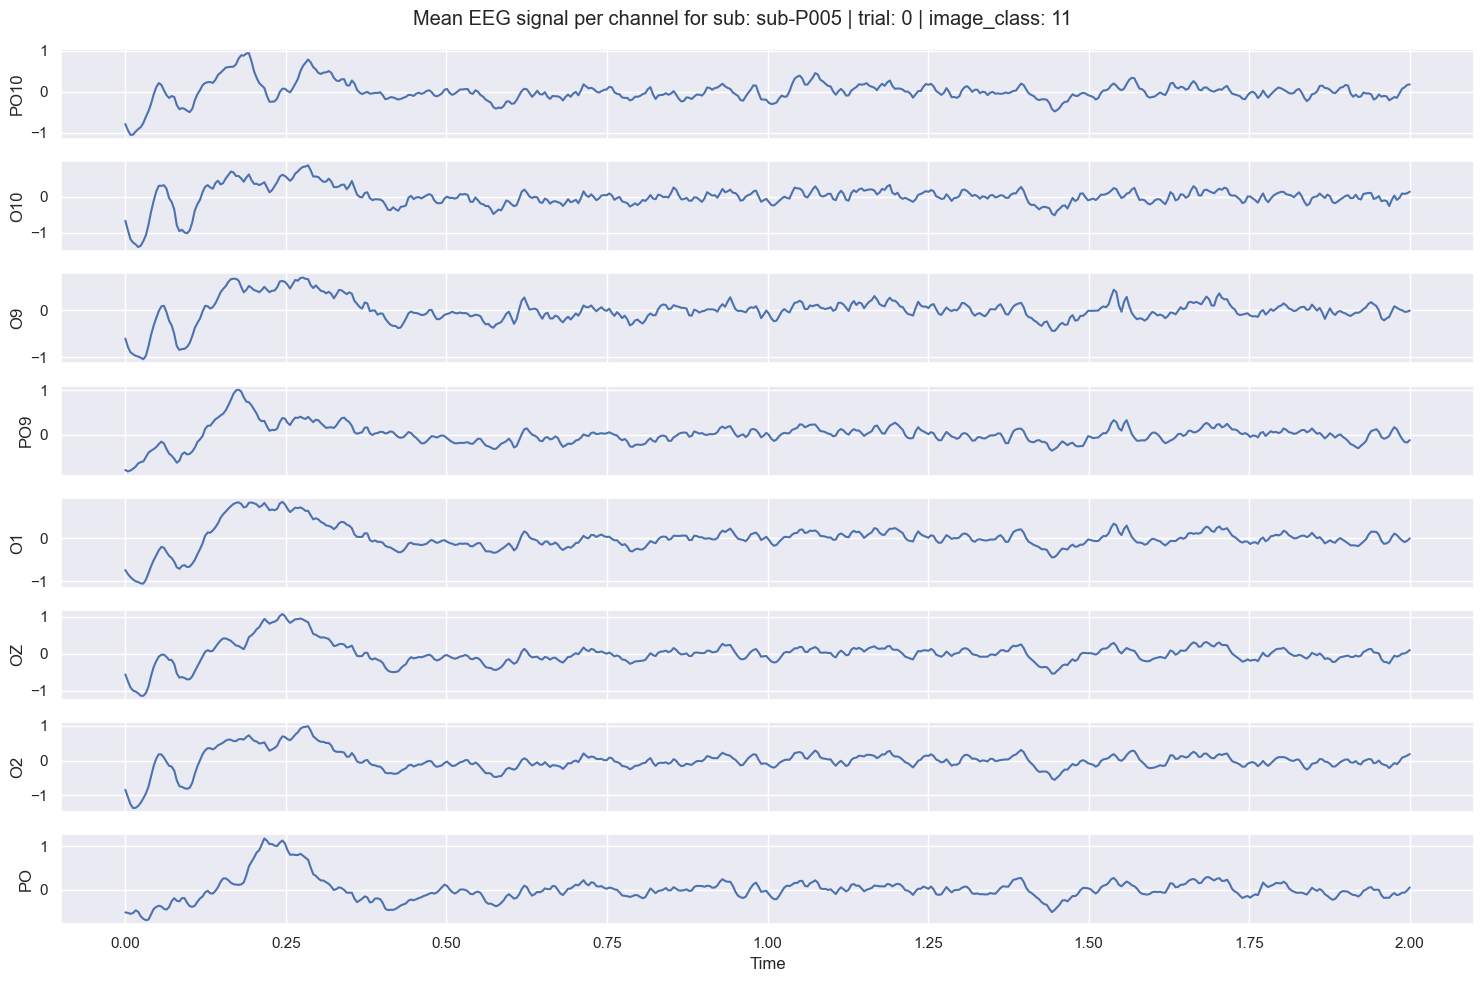

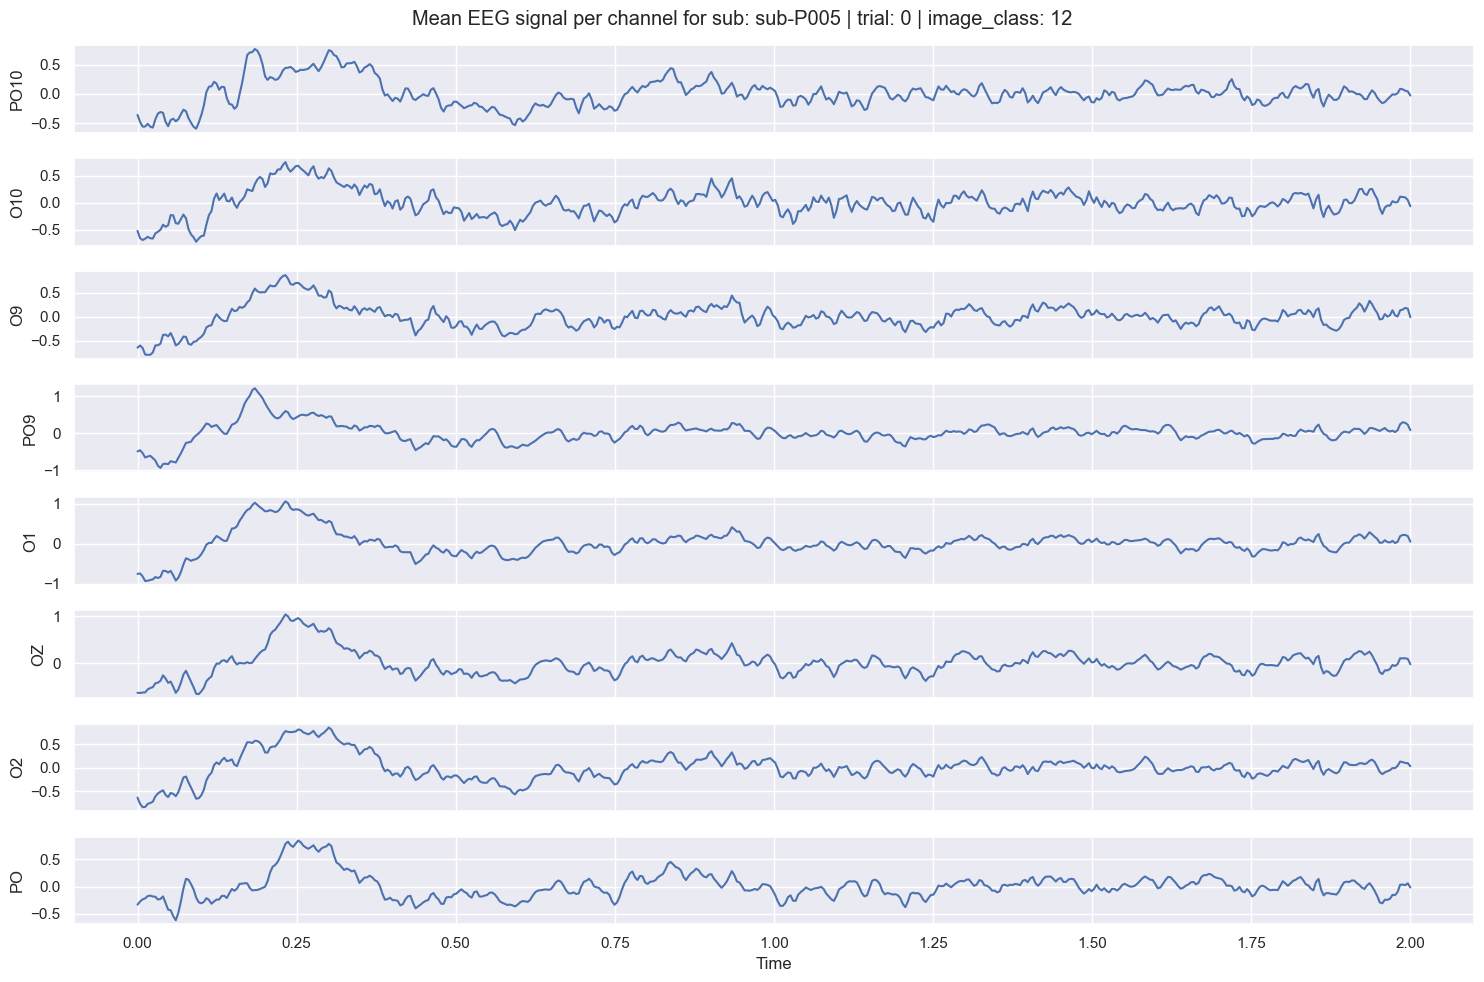

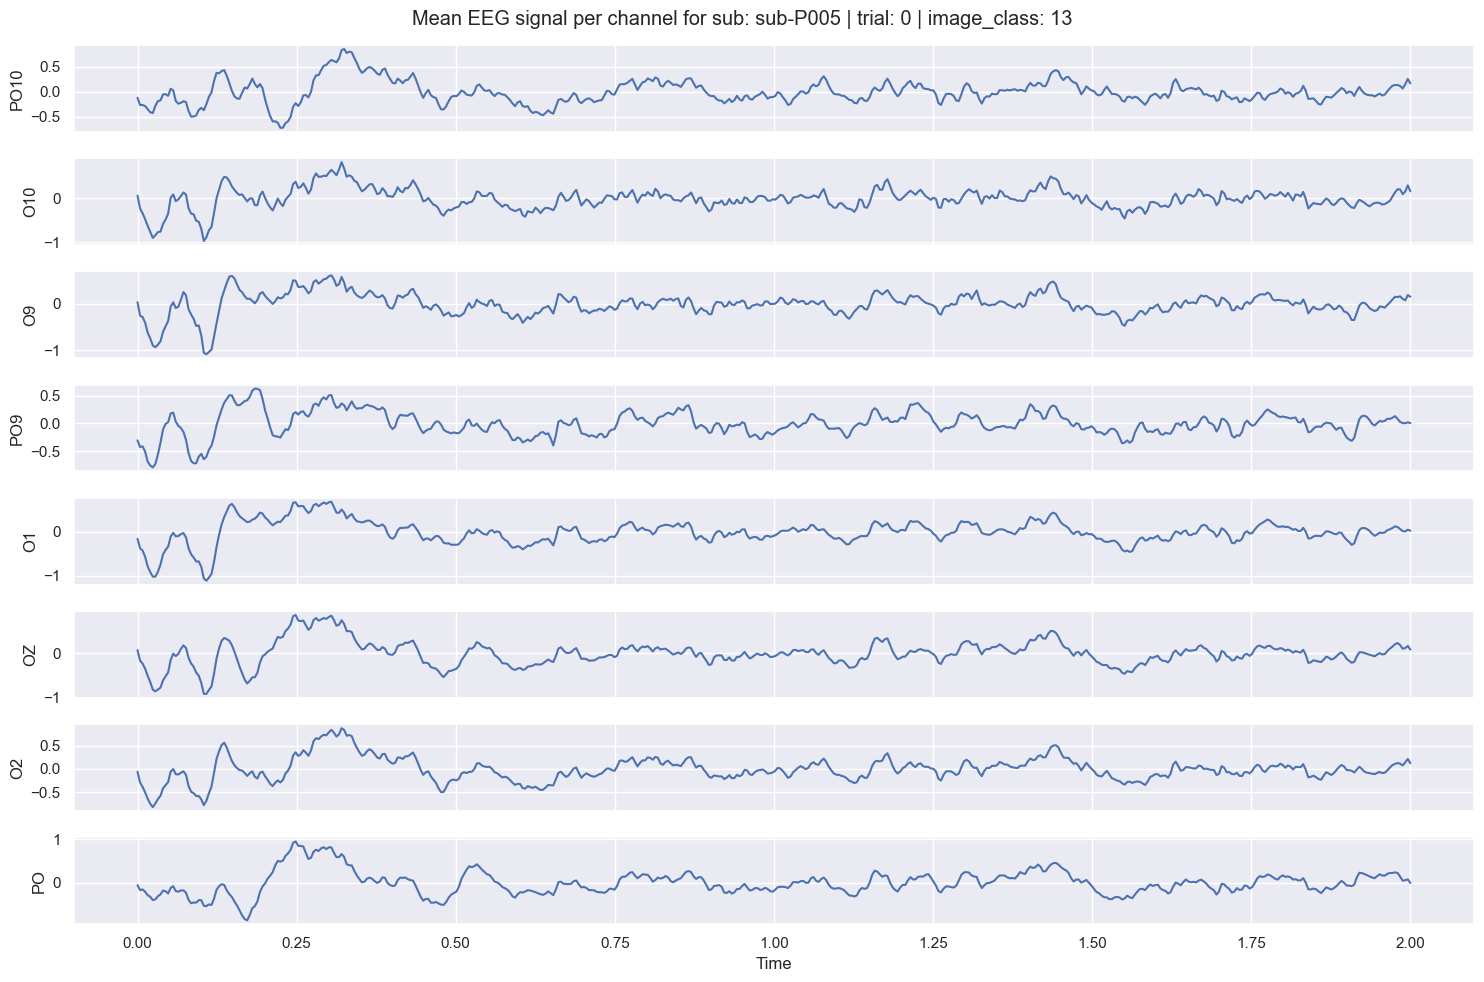

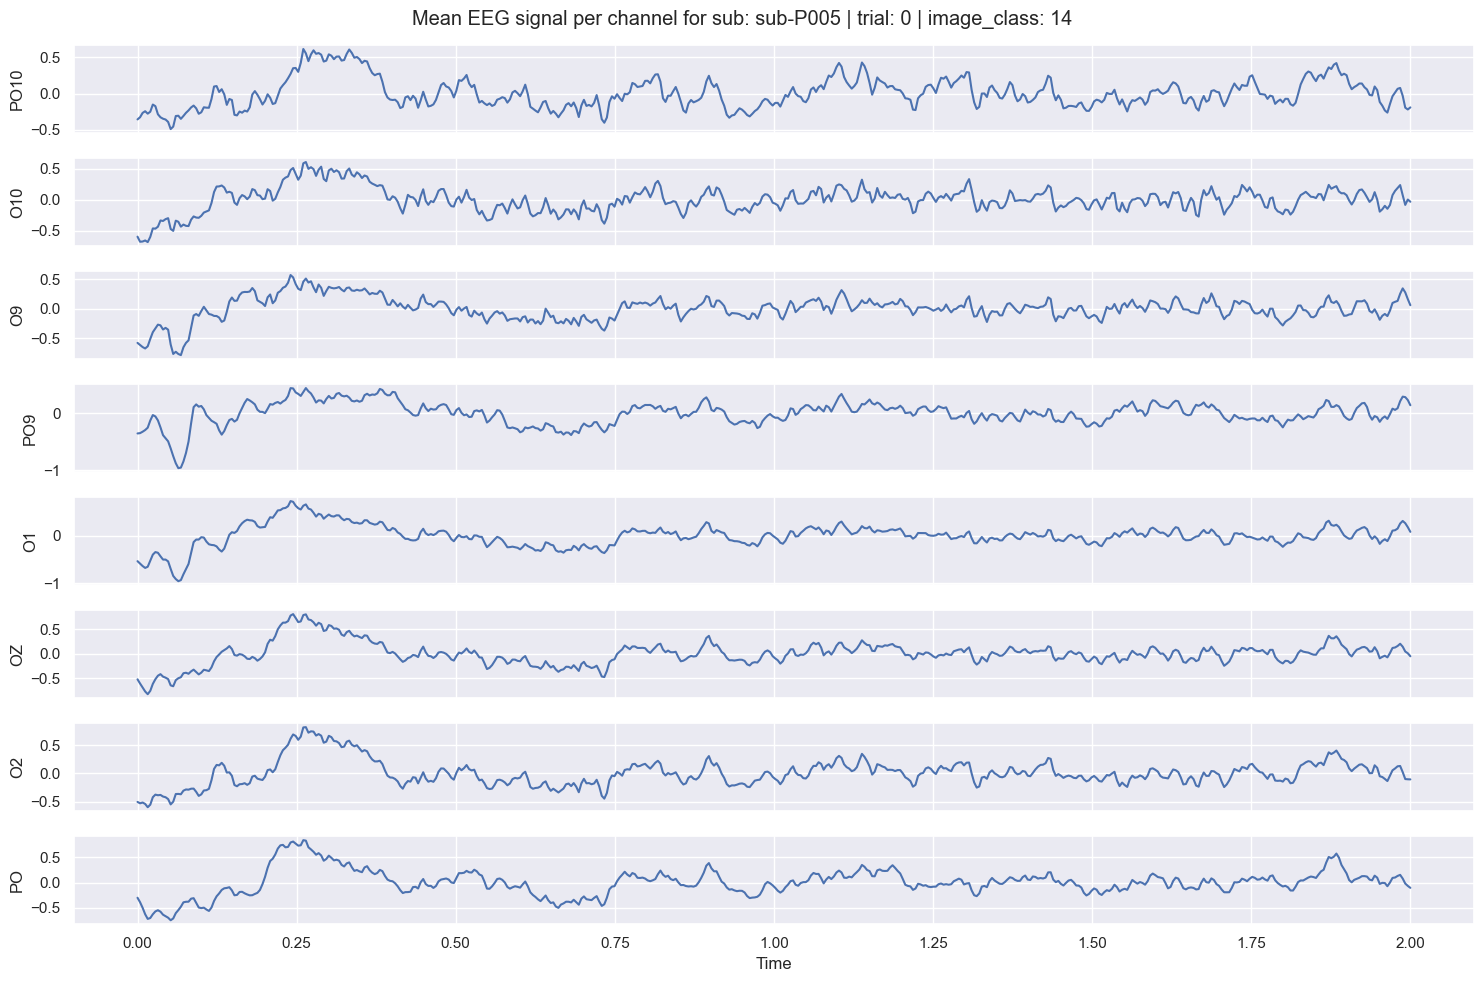

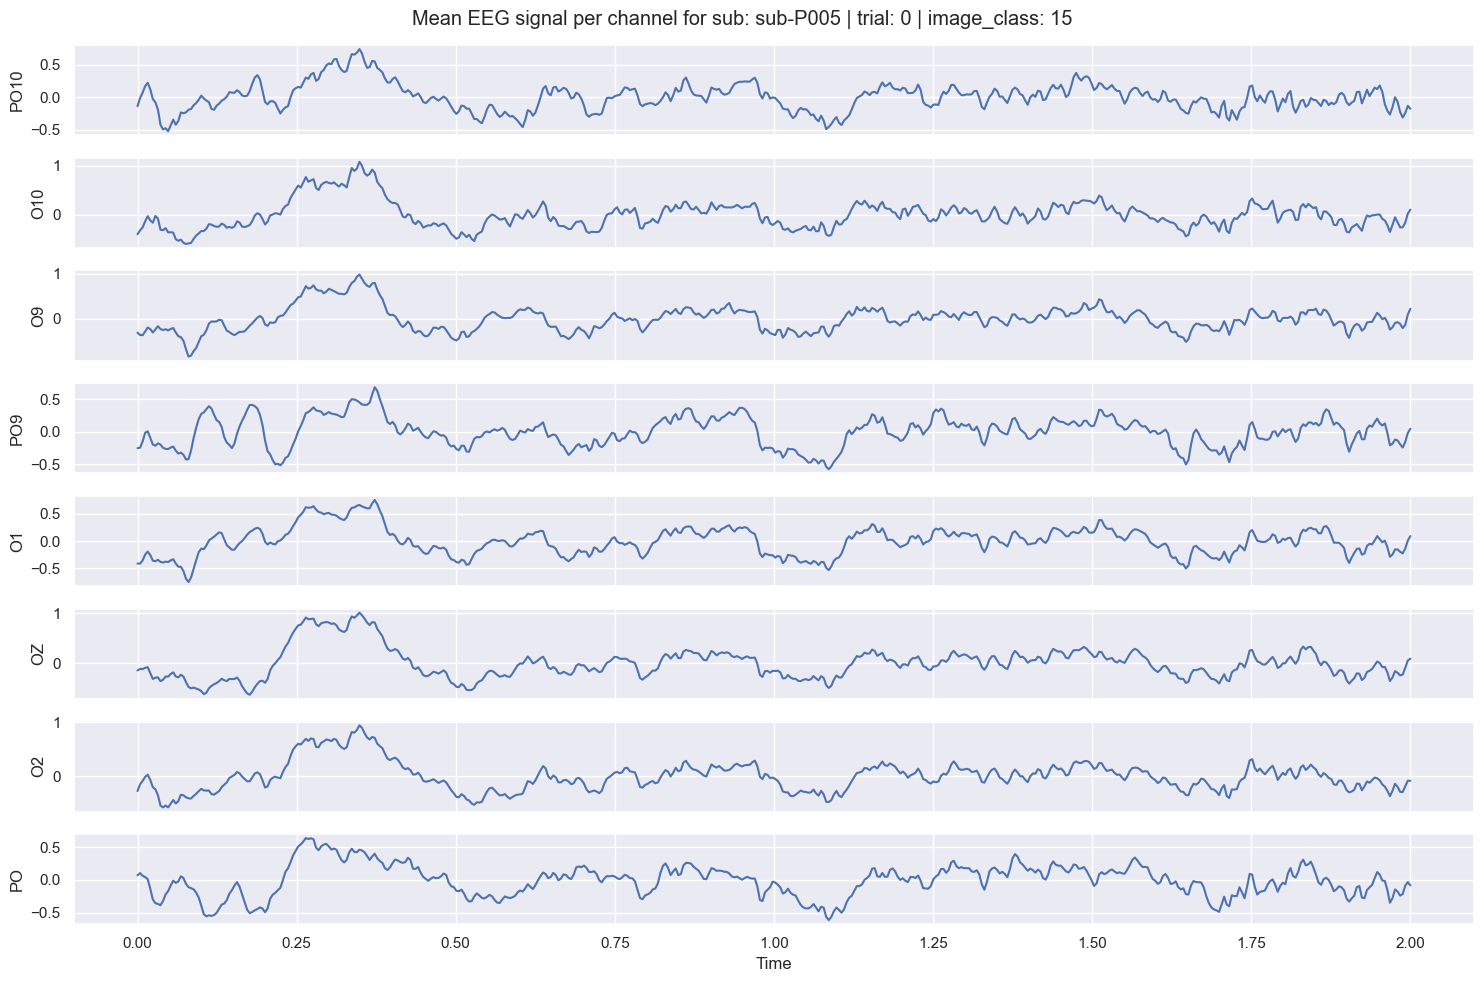

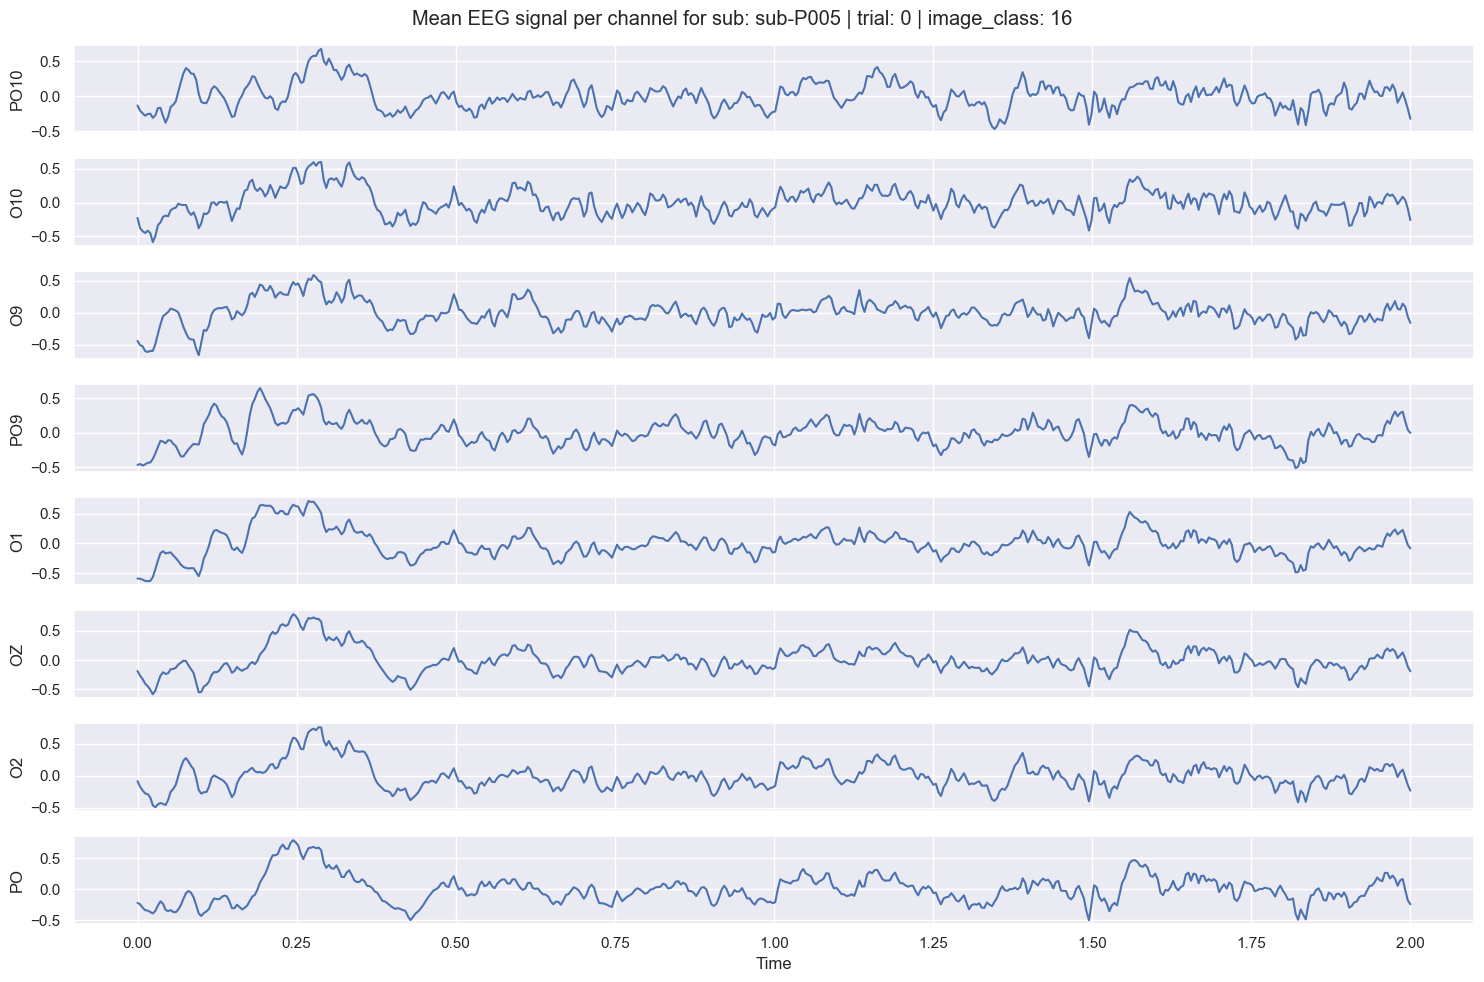

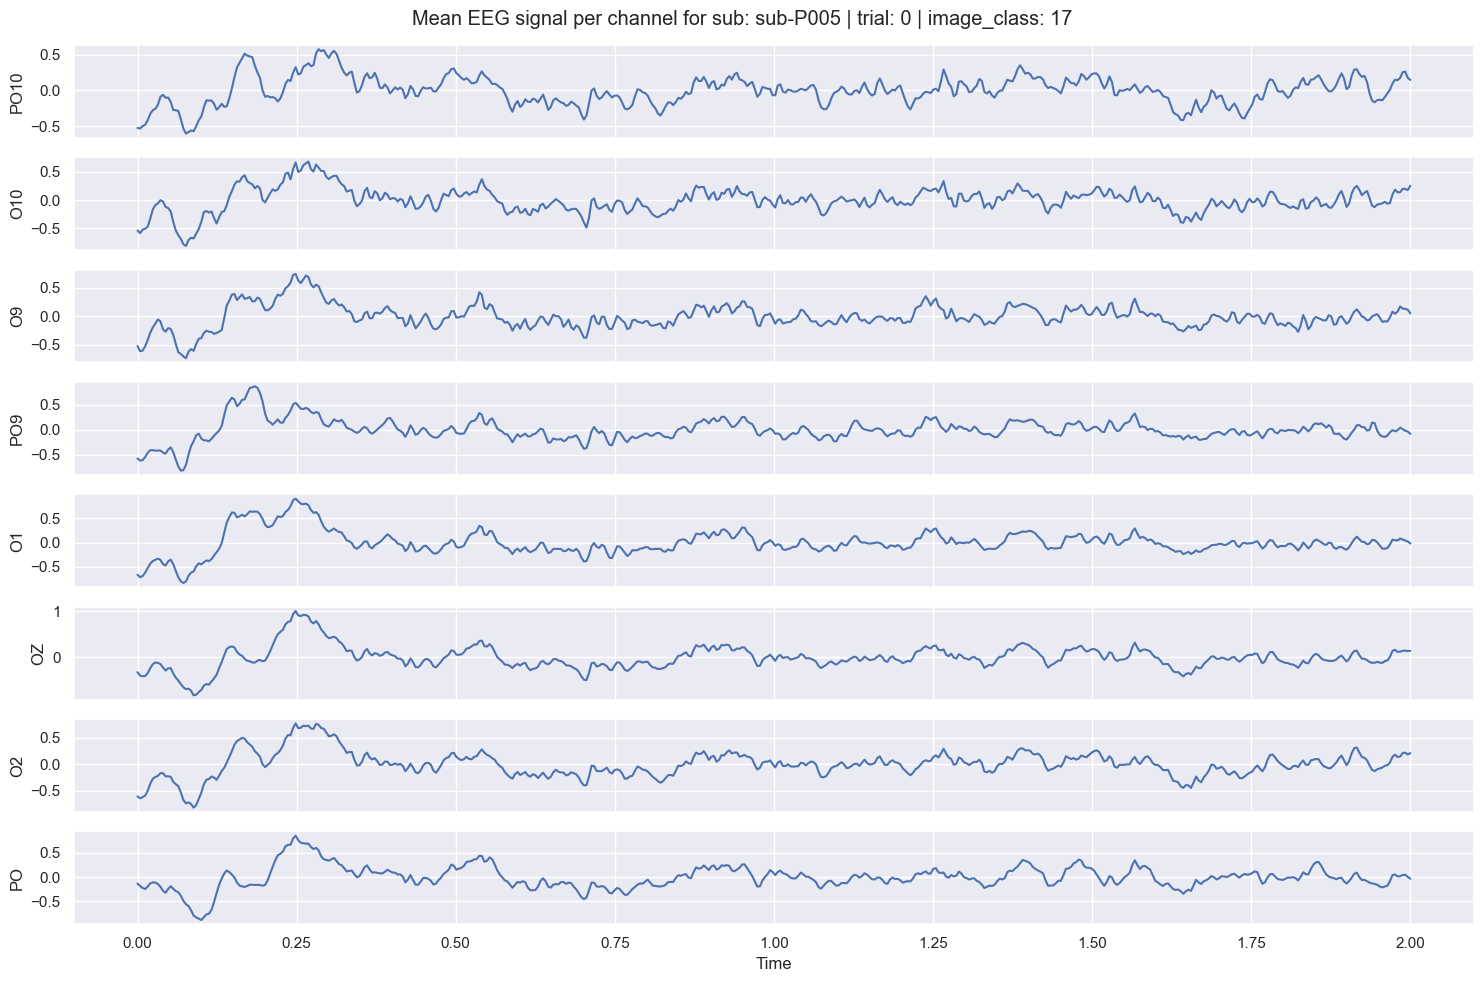

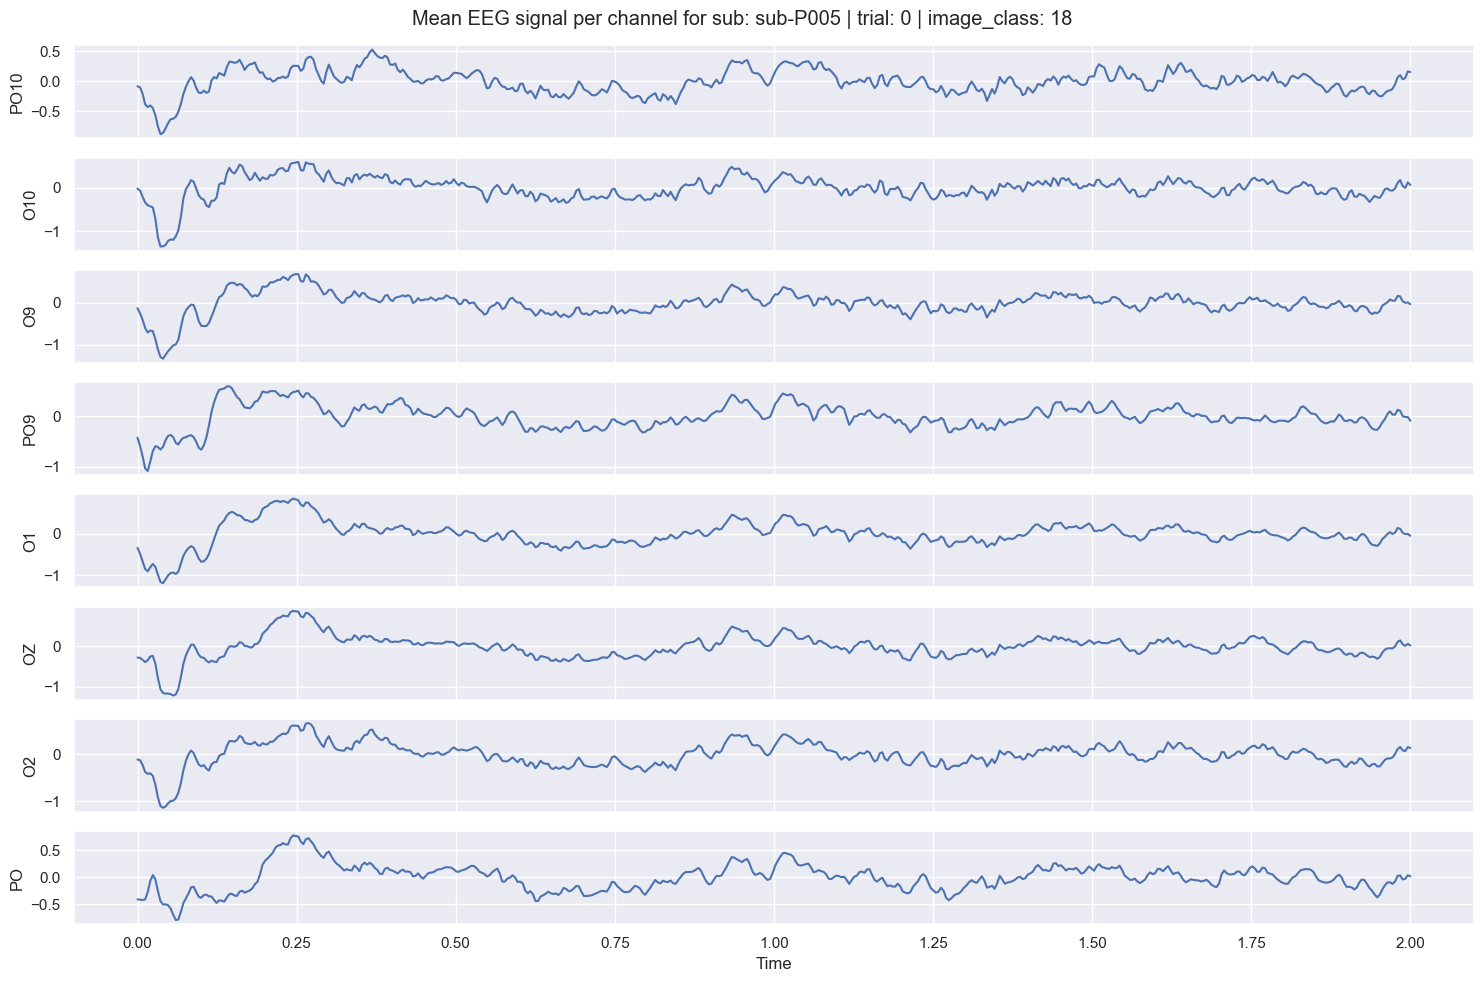

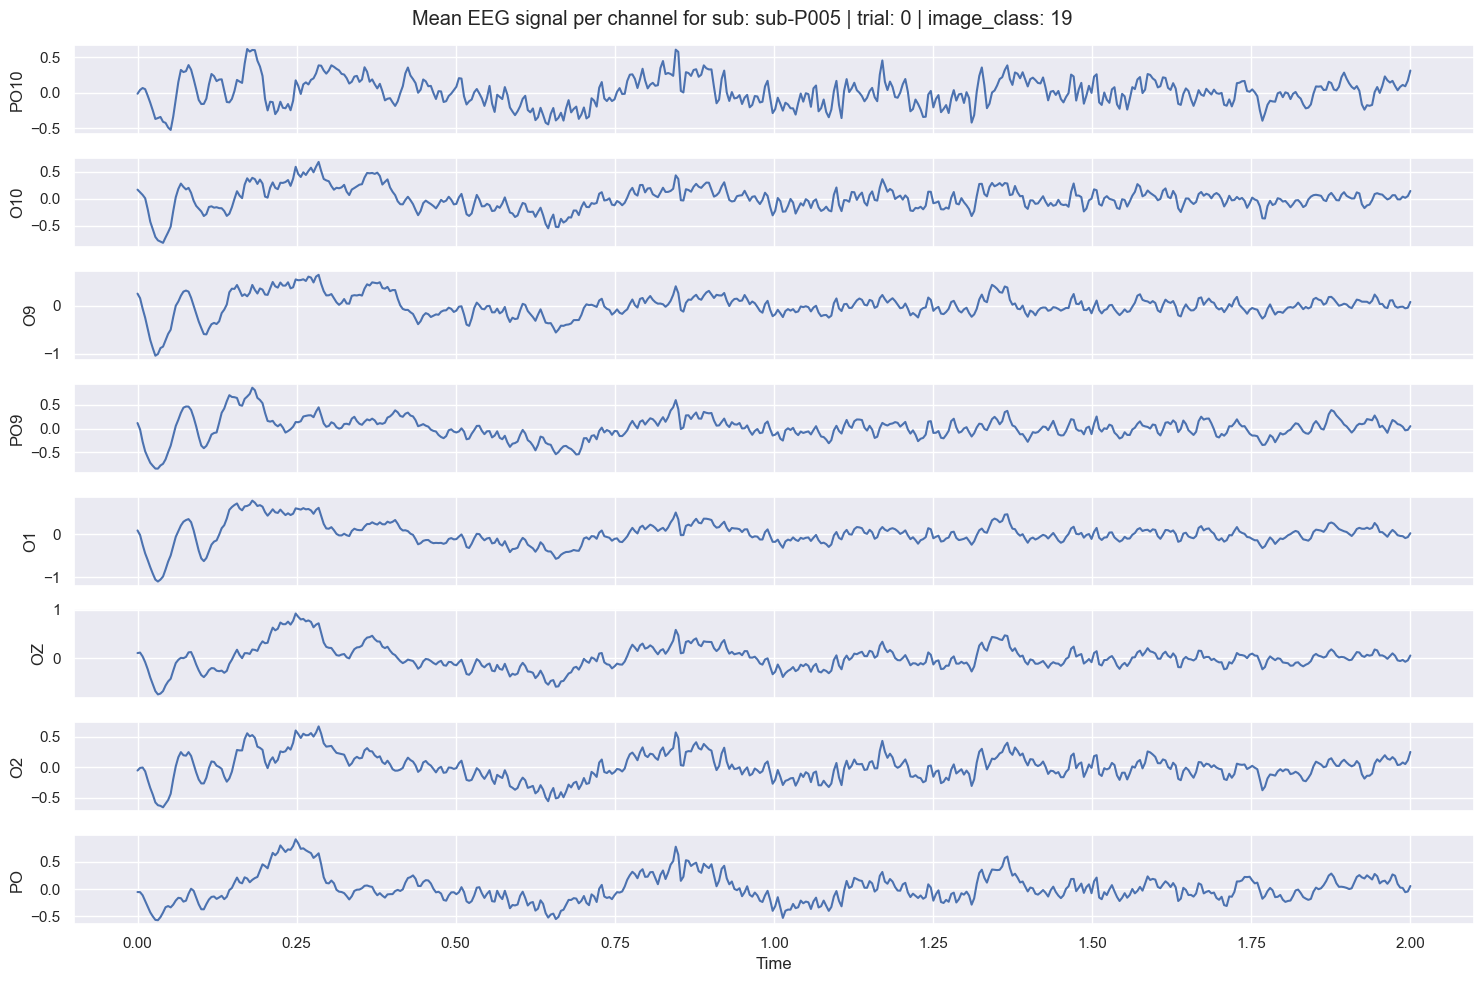

In [6]:
for i in range(20):
    A.plot_eeg_for_class(trial = 0, group_label = i, img_name="preprocessing_pipeline_for_one_class.png")

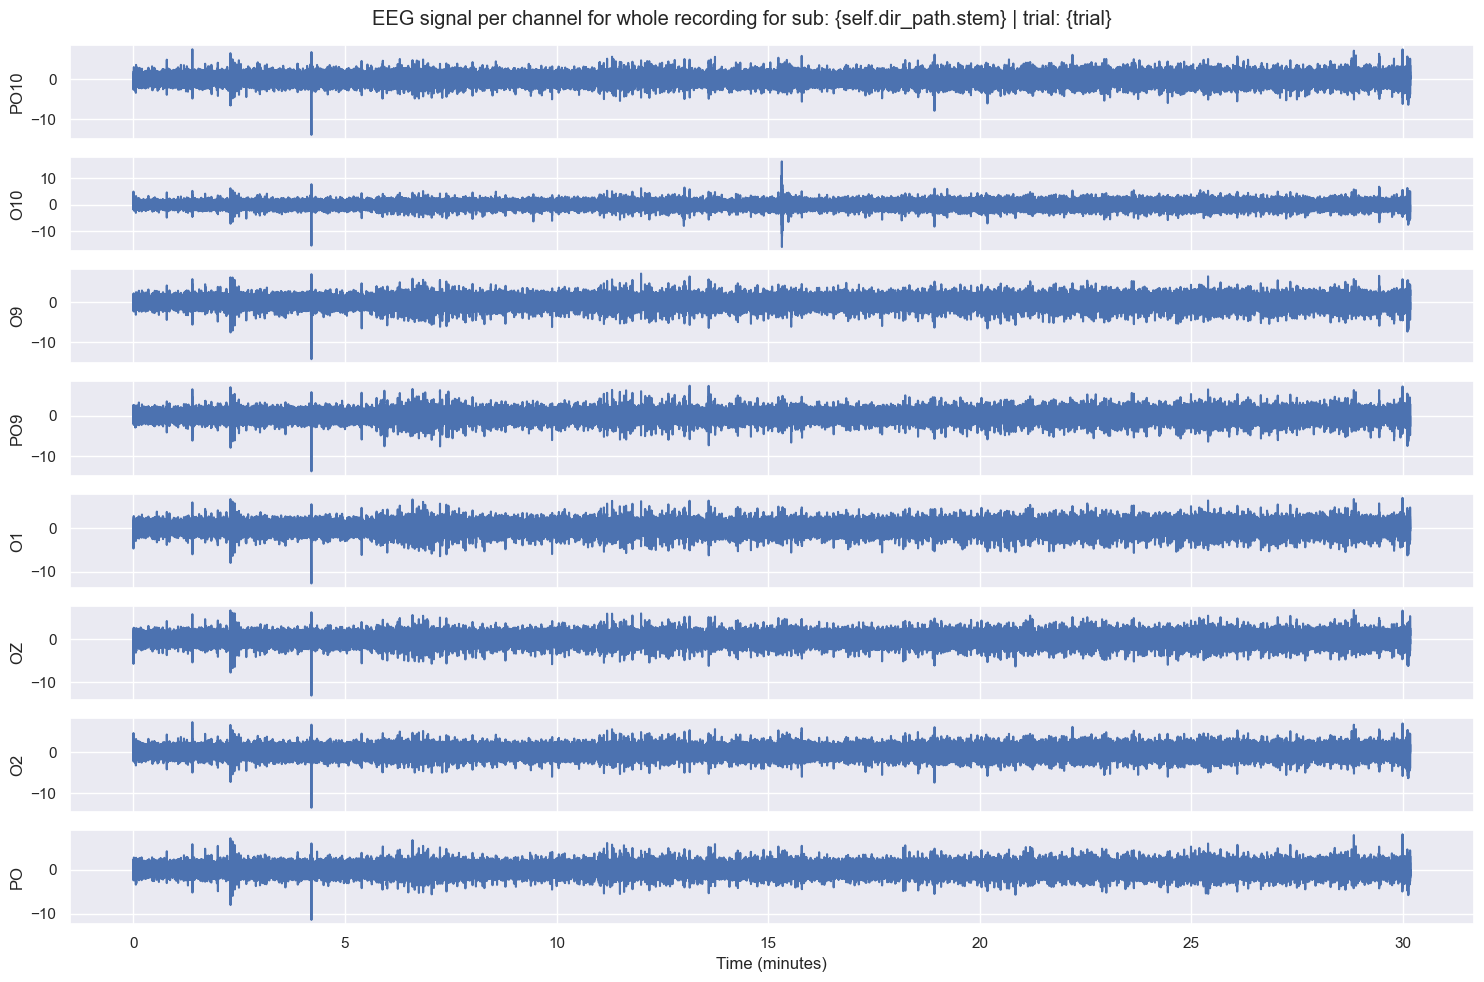

In [7]:
A.plot_eeg(trial=1)